<a href="https://colab.research.google.com/github/wahyufaith/Computer-Vision/blob/main/Computer_Vision_Image_clasification_H1_solve_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computer Vision Image clasification H1**
# **Fashion MNIST**

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# **Explore the data**

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

# **Data preprocessing**

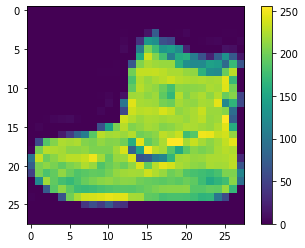

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images/255
test_images = test_images/255

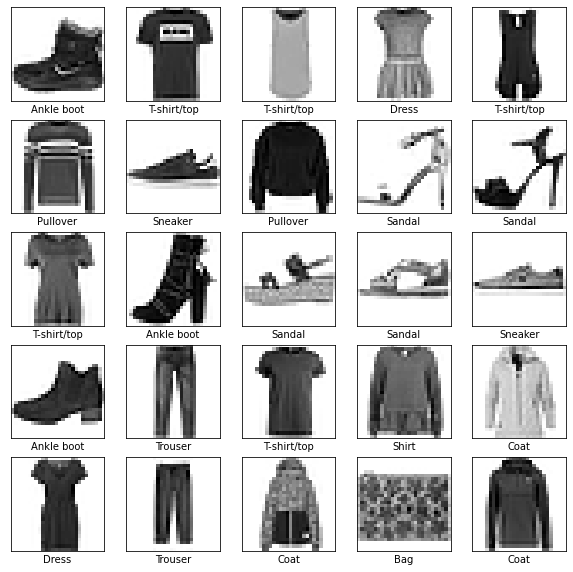

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **Modeling**

In [16]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)])

# **model compile**

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# **Training**

In [18]:
model_history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5001 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3770 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3385 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3156 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2960 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2709 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2598 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2497 - accuracy: 0.9064
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.242

# **Evaluate**

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n Test accuracy:', test_acc)

313/313 - 1s - loss: 0.3465 - accuracy: 0.8833

 Test accuracy: 0.8833000063896179


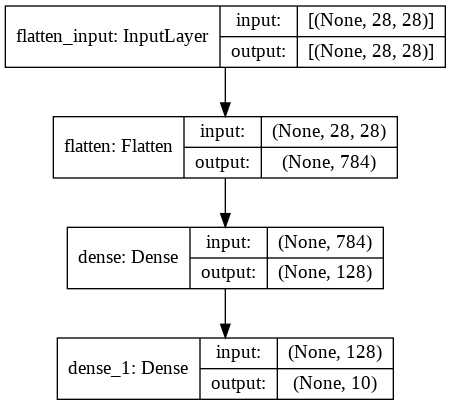

In [20]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)

# **Make prediksi**

In [21]:
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

In [22]:
predictions = probability_model.predict(test_images)

In [23]:
predictions[0]

array([2.4725468e-08, 4.6929887e-09, 3.0622670e-07, 7.8702314e-08,
       8.2109047e-08, 1.3448623e-03, 6.2983290e-08, 4.7237687e-02,
       3.1354475e-06, 9.5141369e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])

9

In [25]:
test_labels[0]

9

In [26]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# **Verifikasi prediksi**


Dengan model yang terlatih, Anda dapat menggunakannya untuk membuat prediksi tentang beberapa gambar.

Mari kita lihat gambar ke-0, prediksi, dan larik prediksi. Label prediksi yang benar berwarna biru dan label prediksi yang salah berwarna merah. Angka tersebut memberikan persentase (dari 100) untuk label yang diprediksi.

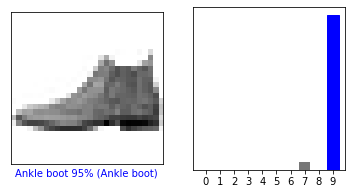

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

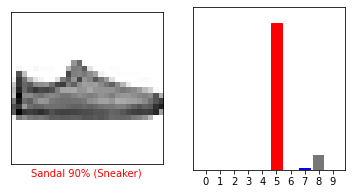

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

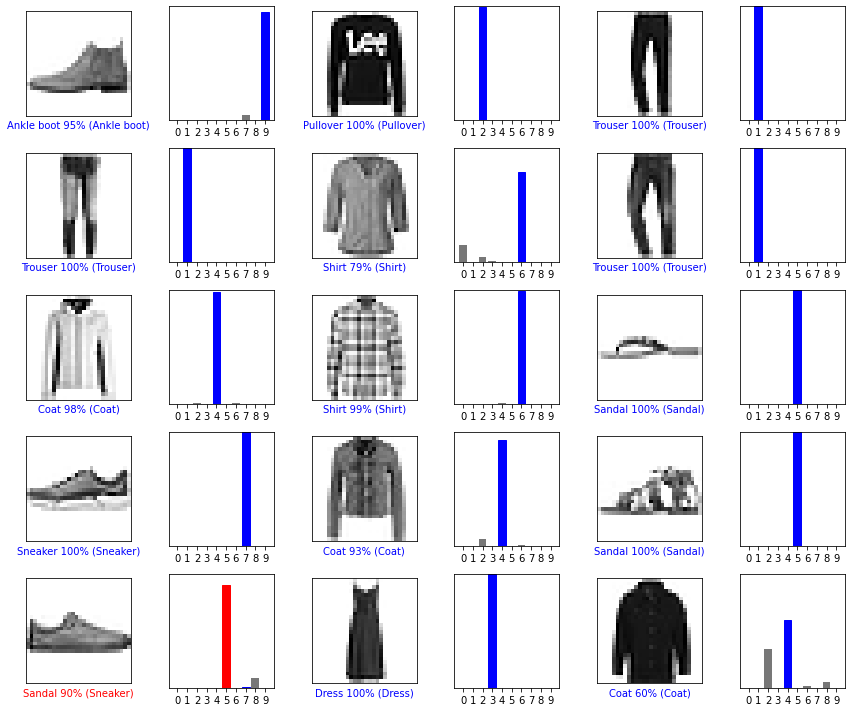

In [29]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# **Gunakan model yang terlatih**


Terakhir, gunakan model terlatih untuk membuat prediksi tentang satu gambar.

In [30]:
img = test_images[1]

print(img.shape)

(28, 28)


In [31]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [32]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.2421406e-05 6.2539584e-13 9.9892092e-01 1.2793465e-07 6.3238014e-04
  2.2432079e-15 4.3422190e-04 2.8928229e-15 8.3963991e-09 1.8505197e-12]]


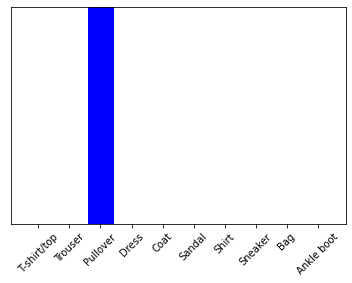

In [33]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [34]:
np.argmax(predictions_single[0])

2

# **Overfit and underfit**

# **1. Baseline model**

In [35]:
baseline_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(16, activation='relu'),
     # tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(10)
      ])
baseline_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

baseline_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [36]:
baseline_history = baseline_model.fit(train_images,
                                      train_labels,
                                      epochs=10,
                                      batch_size=128,
                                      validation_data=(test_images, test_labels),
                                      verbose=2)

Epoch 1/10
469/469 - 1s - loss: 0.7422 - accuracy: 0.7582 - val_loss: 0.5483 - val_accuracy: 0.8144
Epoch 2/10
469/469 - 1s - loss: 0.4880 - accuracy: 0.8352 - val_loss: 0.4909 - val_accuracy: 0.8302
Epoch 3/10
469/469 - 1s - loss: 0.4404 - accuracy: 0.8491 - val_loss: 0.4593 - val_accuracy: 0.8426
Epoch 4/10
469/469 - 1s - loss: 0.4177 - accuracy: 0.8563 - val_loss: 0.4478 - val_accuracy: 0.8477
Epoch 5/10
469/469 - 1s - loss: 0.4019 - accuracy: 0.8608 - val_loss: 0.4376 - val_accuracy: 0.8468
Epoch 6/10
469/469 - 1s - loss: 0.3925 - accuracy: 0.8638 - val_loss: 0.4266 - val_accuracy: 0.8519
Epoch 7/10
469/469 - 1s - loss: 0.3821 - accuracy: 0.8673 - val_loss: 0.4222 - val_accuracy: 0.8527
Epoch 8/10
469/469 - 1s - loss: 0.3777 - accuracy: 0.8683 - val_loss: 0.4127 - val_accuracy: 0.8550
Epoch 9/10
469/469 - 1s - loss: 0.3686 - accuracy: 0.8707 - val_loss: 0.4161 - val_accuracy: 0.8563
Epoch 10/10
469/469 - 1s - loss: 0.3655 - accuracy: 0.8712 - val_loss: 0.4126 - val_accuracy: 0.8546

# **2. small model**

In [37]:
smaller_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dense(10)
])

smaller_model.compile(optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])
smaller_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [38]:
smaller_history=smaller_model.fit(train_images,
                                  train_labels,
                                  epochs=10,
                                  batch_size=128,
                                  validation_data=(test_images,test_labels),
                                  verbose=2)

Epoch 1/10
469/469 - 1s - loss: 1.4766 - accuracy: 0.4632 - val_loss: 0.9989 - val_accuracy: 0.6622
Epoch 2/10
469/469 - 1s - loss: 0.8218 - accuracy: 0.7339 - val_loss: 0.7464 - val_accuracy: 0.7504
Epoch 3/10
469/469 - 1s - loss: 0.6879 - accuracy: 0.7735 - val_loss: 0.6712 - val_accuracy: 0.7716
Epoch 4/10
469/469 - 1s - loss: 0.6342 - accuracy: 0.7871 - val_loss: 0.6421 - val_accuracy: 0.7771
Epoch 5/10
469/469 - 1s - loss: 0.6025 - accuracy: 0.7953 - val_loss: 0.6318 - val_accuracy: 0.7821
Epoch 6/10
469/469 - 1s - loss: 0.5842 - accuracy: 0.8006 - val_loss: 0.6029 - val_accuracy: 0.7933
Epoch 7/10
469/469 - 1s - loss: 0.5680 - accuracy: 0.8073 - val_loss: 0.5912 - val_accuracy: 0.7961
Epoch 8/10
469/469 - 1s - loss: 0.5580 - accuracy: 0.8086 - val_loss: 0.5891 - val_accuracy: 0.7974
Epoch 9/10
469/469 - 1s - loss: 0.5502 - accuracy: 0.8108 - val_loss: 0.5928 - val_accuracy: 0.7972
Epoch 10/10
469/469 - 1s - loss: 0.5441 - accuracy: 0.8130 - val_loss: 0.5842 - val_accuracy: 0.7927

# **3. bigger model**

In [39]:
bigger_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(10)
      ])

bigger_model.compile(optimizer='adam',
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     metrics=['accuracy'])
bigger_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [40]:
bigger_history = bigger_model.fit(train_images,
                                  train_labels,
                                  epochs=10,
                                  batch_size=128,
                                  validation_data=(test_images,test_labels),
                                  verbose=2)

Epoch 1/10
469/469 - 1s - loss: 0.4770 - accuracy: 0.8295 - val_loss: 0.3906 - val_accuracy: 0.8575
Epoch 2/10
469/469 - 1s - loss: 0.3514 - accuracy: 0.8702 - val_loss: 0.3697 - val_accuracy: 0.8642
Epoch 3/10
469/469 - 1s - loss: 0.3141 - accuracy: 0.8844 - val_loss: 0.3799 - val_accuracy: 0.8573
Epoch 4/10
469/469 - 1s - loss: 0.2886 - accuracy: 0.8916 - val_loss: 0.3683 - val_accuracy: 0.8654
Epoch 5/10
469/469 - 1s - loss: 0.2731 - accuracy: 0.8971 - val_loss: 0.3569 - val_accuracy: 0.8720
Epoch 6/10
469/469 - 1s - loss: 0.2554 - accuracy: 0.9036 - val_loss: 0.3358 - val_accuracy: 0.8823
Epoch 7/10
469/469 - 1s - loss: 0.2432 - accuracy: 0.9093 - val_loss: 0.3301 - val_accuracy: 0.8828
Epoch 8/10
469/469 - 1s - loss: 0.2337 - accuracy: 0.9116 - val_loss: 0.3336 - val_accuracy: 0.8828
Epoch 9/10
469/469 - 1s - loss: 0.2239 - accuracy: 0.9153 - val_loss: 0.3270 - val_accuracy: 0.8860
Epoch 10/10
469/469 - 1s - loss: 0.2123 - accuracy: 0.9189 - val_loss: 0.3309 - val_accuracy: 0.8852

# **Plot the training and validation loss**

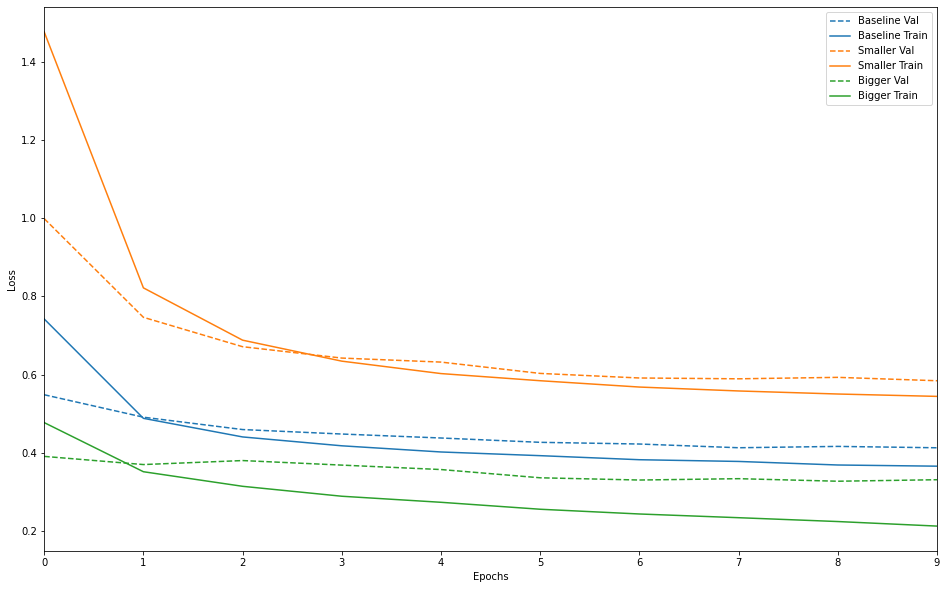

In [42]:
def plot_history(histories, key='loss'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val =  plt.plot(history.epoch, history.history['val_' + key],
                       '--', label=name.title() + ' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title() + ' Train')
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    
    plt.xlim([0, max(history.epoch)])
    
plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history)])

# **Strategies to prevent overfitting**

In [48]:
from tensorflow.keras import regularizers

**Add weight regularization (L1,L2)**

In [56]:
l2_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(512, activation='relu',
                            kernel_regularizer=regularizers.l2(0.001)),
      tf.keras.layers.Dense(512, activation='relu',
                            kernel_regularizer=regularizers.l2(0.001)),
      tf.keras.layers.Dense(10)
      ])

l2_model.compile(optimizer='adam',
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     metrics=['accuracy'])
l2_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [57]:
l2_history = l2_model.fit(train_images,
                                  train_labels,
                                  epochs=10,
                                  batch_size=128,
                                  validation_data=(test_images,test_labels),
                                  verbose=2)

Epoch 1/10
469/469 - 2s - loss: 1.0061 - accuracy: 0.8205 - val_loss: 0.7515 - val_accuracy: 0.8316
Epoch 2/10
469/469 - 1s - loss: 0.6083 - accuracy: 0.8546 - val_loss: 0.5854 - val_accuracy: 0.8422
Epoch 3/10
469/469 - 1s - loss: 0.5120 - accuracy: 0.8636 - val_loss: 0.5018 - val_accuracy: 0.8608
Epoch 4/10
469/469 - 1s - loss: 0.4651 - accuracy: 0.8712 - val_loss: 0.4798 - val_accuracy: 0.8640
Epoch 5/10
469/469 - 1s - loss: 0.4403 - accuracy: 0.8739 - val_loss: 0.4656 - val_accuracy: 0.8645
Epoch 6/10
469/469 - 1s - loss: 0.4260 - accuracy: 0.8774 - val_loss: 0.4453 - val_accuracy: 0.8686
Epoch 7/10
469/469 - 1s - loss: 0.4146 - accuracy: 0.8784 - val_loss: 0.4779 - val_accuracy: 0.8546
Epoch 8/10
469/469 - 1s - loss: 0.4017 - accuracy: 0.8835 - val_loss: 0.4394 - val_accuracy: 0.8719
Epoch 9/10
469/469 - 1s - loss: 0.3934 - accuracy: 0.8842 - val_loss: 0.4263 - val_accuracy: 0.8739
Epoch 10/10
469/469 - 1s - loss: 0.3833 - accuracy: 0.8877 - val_loss: 0.4625 - val_accuracy: 0.8541

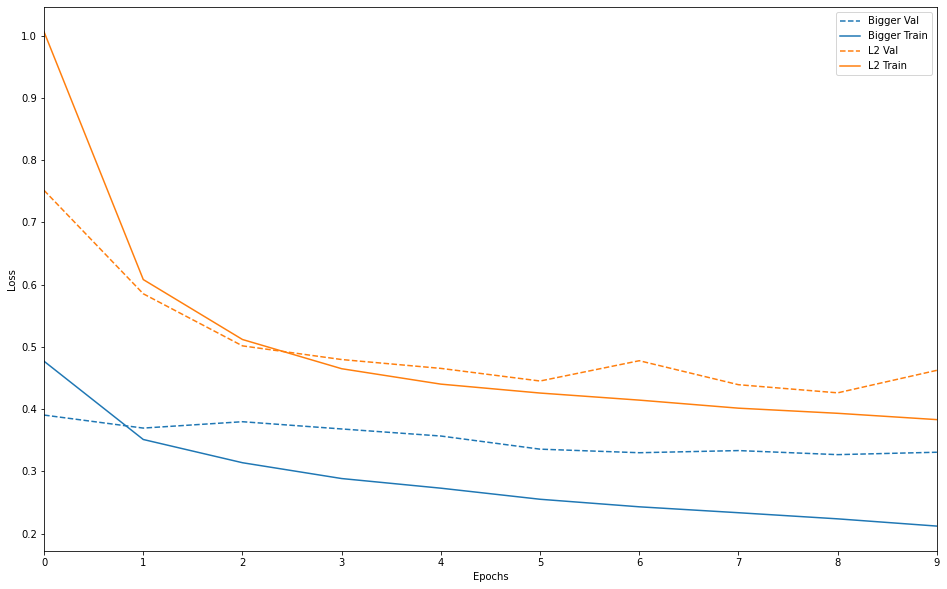

In [58]:
plot_history([('bigger', bigger_history),
             ('l2', l2_history)])

**dropout**

In [60]:
do_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(512, activation='relu'),
                            tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(512, activation='relu'),
                            tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(10)
      ])

do_model.compile(optimizer='adam',
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     metrics=['accuracy'])
do_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

In [61]:
do_history = do_model.fit(train_images,
                                  train_labels,
                                  epochs=10,
                                  batch_size=128,
                                  validation_data=(test_images,test_labels),
                                  verbose=2)

Epoch 1/10
469/469 - 2s - loss: 0.6233 - accuracy: 0.7753 - val_loss: 0.4522 - val_accuracy: 0.8365
Epoch 2/10
469/469 - 1s - loss: 0.4573 - accuracy: 0.8358 - val_loss: 0.4020 - val_accuracy: 0.8543
Epoch 3/10
469/469 - 1s - loss: 0.4247 - accuracy: 0.8458 - val_loss: 0.3926 - val_accuracy: 0.8510
Epoch 4/10
469/469 - 1s - loss: 0.4000 - accuracy: 0.8535 - val_loss: 0.3847 - val_accuracy: 0.8579
Epoch 5/10
469/469 - 1s - loss: 0.3853 - accuracy: 0.8584 - val_loss: 0.3635 - val_accuracy: 0.8646
Epoch 6/10
469/469 - 1s - loss: 0.3730 - accuracy: 0.8631 - val_loss: 0.3639 - val_accuracy: 0.8683
Epoch 7/10
469/469 - 1s - loss: 0.3636 - accuracy: 0.8662 - val_loss: 0.3534 - val_accuracy: 0.8702
Epoch 8/10
469/469 - 1s - loss: 0.3559 - accuracy: 0.8684 - val_loss: 0.3686 - val_accuracy: 0.8658
Epoch 9/10
469/469 - 1s - loss: 0.3490 - accuracy: 0.8703 - val_loss: 0.3530 - val_accuracy: 0.8754
Epoch 10/10
469/469 - 1s - loss: 0.3396 - accuracy: 0.8751 - val_loss: 0.3404 - val_accuracy: 0.8775

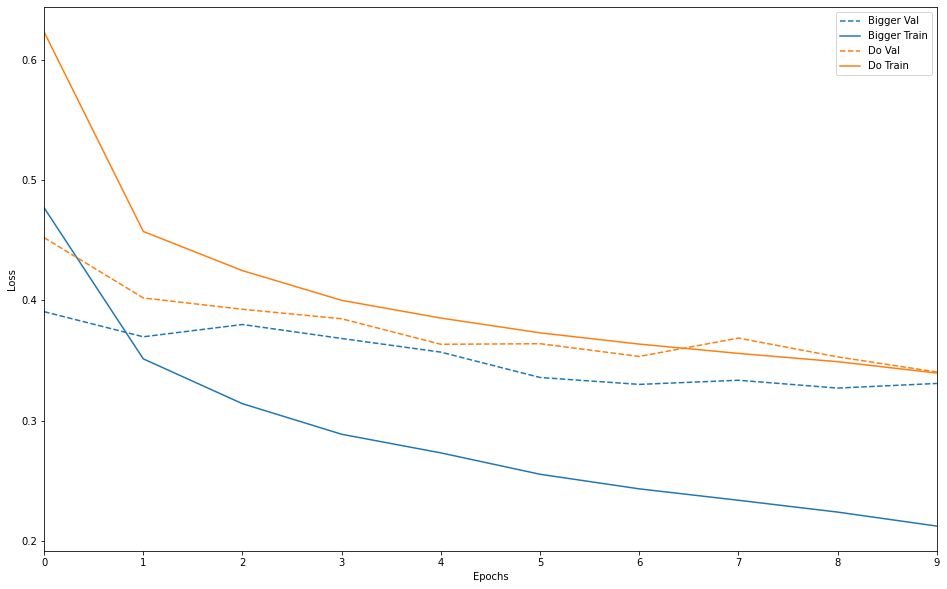

In [62]:
plot_history([('bigger', bigger_history),
             ('do', do_history)])

# **Combined L2 + dropout**

In [63]:
combined_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(512, activation='relu',
                            kernel_regularizer=regularizers.l2(0.001)),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(512, activation='relu',
                            kernel_regularizer=regularizers.l2(0.001)),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(10)
      ])

combined_model.compile(optimizer='adam',
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     metrics=['accuracy'])
combined_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_______________________________________________

In [64]:
combined_history = combined_model.fit(train_images,
                                  train_labels,
                                  epochs=10,
                                  batch_size=128,
                                  validation_data=(test_images,test_labels),
                                  verbose=2)

Epoch 1/10
469/469 - 2s - loss: 1.1983 - accuracy: 0.7749 - val_loss: 0.7928 - val_accuracy: 0.8363
Epoch 2/10
469/469 - 1s - loss: 0.7485 - accuracy: 0.8240 - val_loss: 0.6375 - val_accuracy: 0.8461
Epoch 3/10
469/469 - 1s - loss: 0.6494 - accuracy: 0.8301 - val_loss: 0.6108 - val_accuracy: 0.8389
Epoch 4/10
469/469 - 1s - loss: 0.6214 - accuracy: 0.8322 - val_loss: 0.5649 - val_accuracy: 0.8469
Epoch 5/10
469/469 - 1s - loss: 0.5945 - accuracy: 0.8364 - val_loss: 0.5418 - val_accuracy: 0.8496
Epoch 6/10
469/469 - 1s - loss: 0.5851 - accuracy: 0.8373 - val_loss: 0.5398 - val_accuracy: 0.8503
Epoch 7/10
469/469 - 1s - loss: 0.5804 - accuracy: 0.8378 - val_loss: 0.5434 - val_accuracy: 0.8470
Epoch 8/10
469/469 - 1s - loss: 0.5777 - accuracy: 0.8380 - val_loss: 0.5333 - val_accuracy: 0.8521
Epoch 9/10
469/469 - 1s - loss: 0.5773 - accuracy: 0.8384 - val_loss: 0.5296 - val_accuracy: 0.8523
Epoch 10/10
469/469 - 1s - loss: 0.5688 - accuracy: 0.8394 - val_loss: 0.5317 - val_accuracy: 0.8508

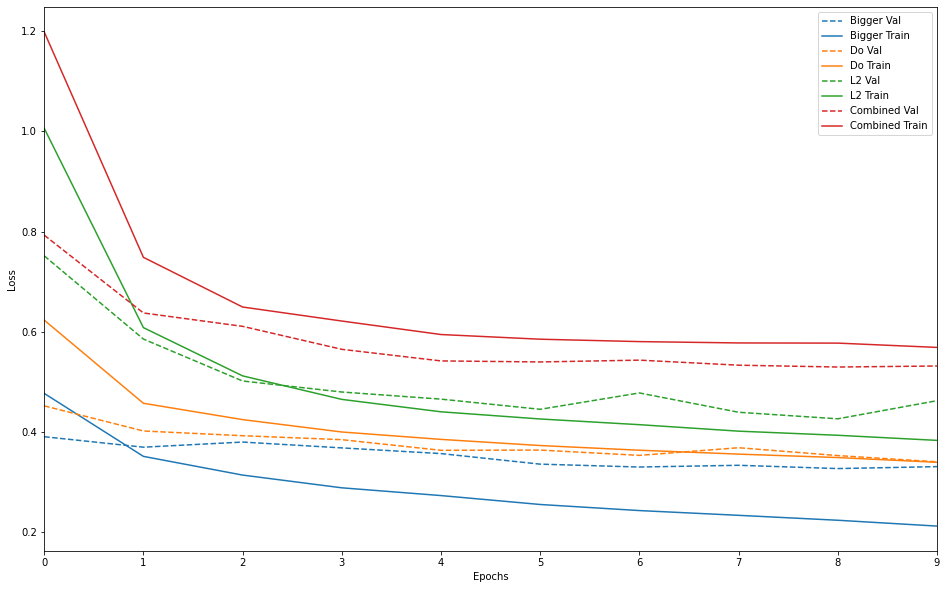

In [67]:
plot_history([('bigger', bigger_history),
              ('do', do_history),
              ('l2', l2_history),
             ('combined', combined_history)])